### Packages

In [196]:
import pandas as pkg_pandas
from matplotlib import pyplot as pkg_plot

### Raw Data

#### Pre-Work

In [197]:
baseline_df = pkg_pandas.read_csv("../data/cbex-hr-analytics-raw.csv")
baseline_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Plot: Satisfaction Level (x-axis) x Retention Failure (y-axis)

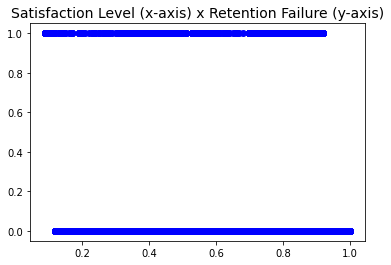

In [198]:
%matplotlib inline
pkg_plot.title(label='Satisfaction Level (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.satisfaction_level, baseline_df.left, color='blue', marker='o')

#### Plot: Last Evaluation (x-axis) x Retention Failure (y-axis)

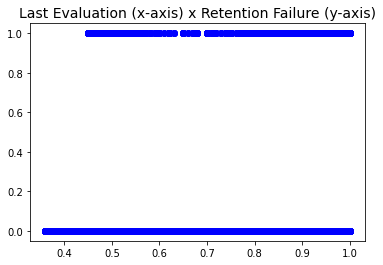

In [199]:
%matplotlib inline
pkg_plot.title(label='Last Evaluation (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.last_evaluation, baseline_df.left, color='blue', marker='o')

#### Plot: Project Number (x-axis) x Retention Failure (y-axis)

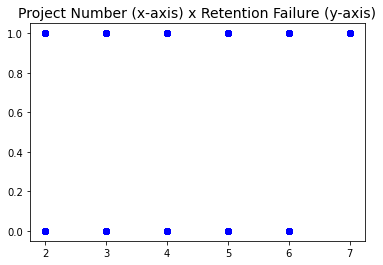

In [200]:
%matplotlib inline
pkg_plot.title(label='Project Number (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.number_project, baseline_df.left, color='blue', marker='o')

#### Plot: Working Hours (x-axis) x Retention Failure (y-axis)

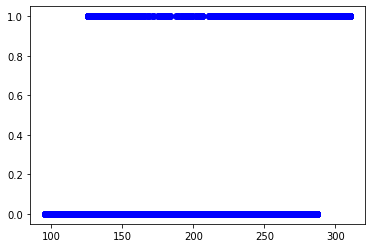

In [201]:
%matplotlib inline
pkg_plot.scatter(baseline_df.average_montly_hours, baseline_df.left, color='blue', marker='o')

#### Plot: Service Period (x-axis) x Retention Failure (y-axis)

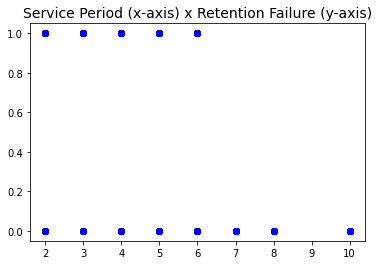

In [202]:
%matplotlib inline
pkg_plot.title(label='Service Period (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.time_spend_company, baseline_df.left, color='blue', marker='o')

#### Plot: Promotion in Last 5-Years (x-axis) x Retention Failure (y-axis)

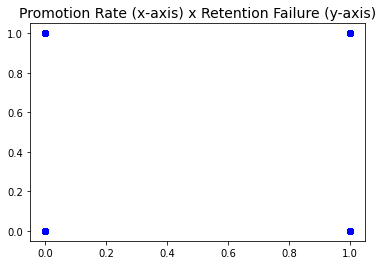

In [203]:
%matplotlib inline
pkg_plot.title(label='Promotion Rate (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.promotion_last_5years, baseline_df.left, color='blue', marker='o')

#### Plot: Department (x-axis) x Retention Failure (y-axis)

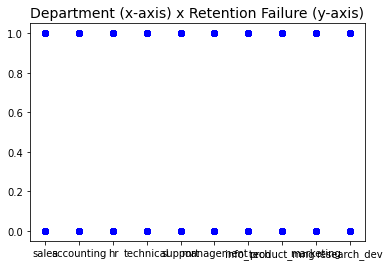

In [204]:
%matplotlib inline
pkg_plot.title(label='Department (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.department, baseline_df.left, color='blue', marker='o')

#### Plot: Salary Range (x-axis) x Retention Failure (y-axis)

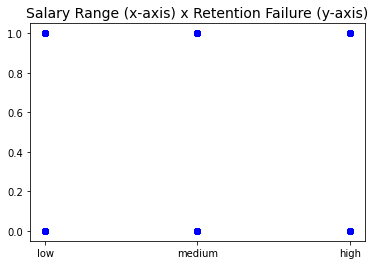

In [205]:
%matplotlib inline
pkg_plot.title(label='Salary Range (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.salary, baseline_df.left, color='blue', marker='o')

### Raw Data Observations

- If an employee serves more than 7 years, then most likely they will remain with company for a long time
- Employees of Project Number "7" have all left

### Aggregate Data

#### Pre-Work

In [206]:
min_data = baseline_df.get(['salary','left', 'department'])
min_data

,salary,left,department
0,low,1,sales
1,medium,1,sales
2,medium,1,sales
3,low,1,sales
4,low,1,sales
...,...,...,...
14994,low,1,support
14995,low,1,support
14996,low,1,support
14997,low,1,support


In [207]:
def get_group_employee_retention_ratios(dataset_df, group_name):
    group_ratio_df = pkg_pandas.DataFrame(columns=[group_name,'remained','left'])
    groups = dataset_df.groupby([group_name])
    for group_key, group_value_set in groups:
        sub_groups = group_value_set.groupby(['left'])
        left_count = remained_count = 0
        left_ratio = remained_ratio = 0.00
        for sub_group_key, sub_group_value_set in sub_groups:
            if (sub_group_key == 0): remained_count = len(sub_group_value_set)
            if (sub_group_key == 1): left_count = len(sub_group_value_set)
        remained_ratio = remained_count * 100 / (left_count + remained_count)
        left_ratio = left_count * 100 / (left_count + remained_count)
        group_ratio_df.loc[len(group_ratio_df)] = [group_key, remained_ratio, left_ratio]

    return group_ratio_df

#### Group By: Salary

In [208]:
salary_ratio_df = get_group_employee_retention_ratios(dataset_df=min_data, group_name='salary')
salary_ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-salary-employee-retentions.csv", index=False)
salary_ratio_df

,salary,remained,left
0,high,93.371059,6.628941
1,low,70.311646,29.688354
2,medium,79.568725,20.431275


<AxesSubplot:title={'center':'Salary Ranges (x-axis) x Employee Retention Ratios (y-axis)'}, xlabel='salary'>

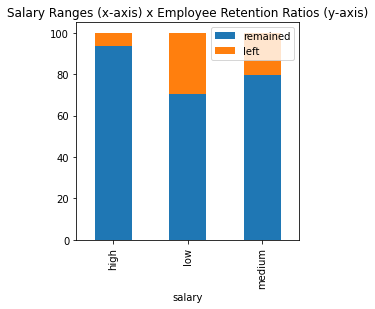

In [209]:
salary_ratio_df.plot(x='salary', kind='bar', stacked=True, \
    title='Salary Ranges (x-axis) x Employee Retention Ratios (y-axis)', figsize=(4,4))

#### Group By: Department

In [210]:
dept_ratio_df = get_group_employee_retention_ratios(dataset_df=min_data, group_name='department')
dept_ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-department-employee-retentions.csv", index=False)
dept_ratio_df

,department,remained,left
0,accounting,73.402868,26.597132
1,hr,70.906631,29.093369
2,info_tech,77.750611,22.249389
3,management,85.555556,14.444444
4,marketing,76.340326,23.659674
5,product_mng,78.048780,21.951220
6,research_dev,84.625159,15.374841
7,sales,75.507246,24.492754
8,support,75.100942,24.899058
9,technical,74.375000,25.625000


<AxesSubplot:title={'center':'Departments (x-axis) x Employee Retention Ratios (y-axis)'}, xlabel='department'>

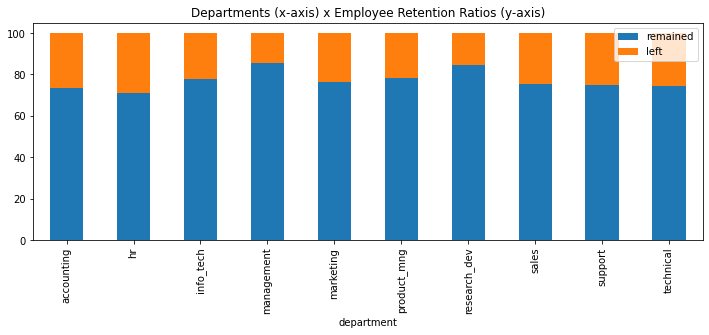

In [211]:
dept_ratio_df.plot(x='department', kind='bar', stacked=True, \
    title='Departments (x-axis) x Employee Retention Ratios (y-axis)', figsize=(12,4))

### Aggregate Data Observations

**Salary**:
- High salary employee group has low attrition rate: ~7%
- Low salary employee group has high attrition rate: ~30%
- Salary has definite influence on employee attrition

**Department**:
- Research and Development, Management departments have low attrition rate: ~15%
- HR department has high attrition rate: ~29%
- Deparment work style may be the contributor for employee attrition

### Encode Data

**Encode**: Encode non-numerical value columns into dummy-variable columns

In [212]:
department_dummies = pkg_pandas.get_dummies(baseline_df.department)
department_dummies

,accounting,hr,info_tech,management,marketing,product_mng,research_dev,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [213]:
department_values = department_dummies.columns
department_value_map = {}

for i in range(len(department_values)):
    department_value_map[department_values[i]] = "department_" + department_values[i]

department_dummies = department_dummies.rename(columns=department_value_map)
department_dummies = department_dummies.drop(department_value_map[department_values[0]], axis='columns')
department_dummies

,department_hr,department_info_tech,department_management,department_marketing,department_product_mng,department_research_dev,department_sales,department_support,department_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [214]:
salary_dummies = pkg_pandas.get_dummies(baseline_df.salary)
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [215]:
salary_values = salary_dummies.columns
salary_value_map = {}

for i in range(len(salary_values)):
    salary_value_map[salary_values[i]] = "salary_" + salary_values[i]

salary_dummies = salary_dummies.rename(columns=salary_value_map)
salary_dummies = salary_dummies.drop(salary_value_map[salary_values[0]], axis='columns')
salary_dummies

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [216]:
encoded_baseline_df = baseline_df
encoded_baseline_df = encoded_baseline_df.drop(['department','salary'],axis='columns')
encoded_baseline_df = pkg_pandas.concat([encoded_baseline_df,department_dummies,salary_dummies],axis='columns')
encoded_baseline_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-encoded.csv", index=False)
encoded_baseline_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_hr,department_info_tech,department_management,department_marketing,department_product_mng,department_research_dev,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0
